## Analisis y Tratamiento de Imágenes Satelitales

## TP1

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 2. Se selecciona una imagen jpeg (img1) y una imagen satelital óptica (img2):

a) Se cargan las imágenes y se despliegan.

In [3]:
# Primero, se carga la imagen jpeg
img1 = cv2.imread("C:/Users/arnic/Desktop/Ariel/MCD/13 - A y T de Imagenes satelitales/Images/FOTO-TURISMO-1-1024x615.jpeg")
type(img1)

numpy.ndarray

In [ ]:
# Se observa que la librería OpenCV convierte automáticamente el archivo jpeg en una matriz numérica de numpy.

In [4]:
img1.shape

(615, 1024, 3)

In [ ]:
# La imagen img1 tiene una dimension de 615 píxeles de alto x 1024 píxeles de ancho. El 3 nos indica el uso del sistema RGB.

In [ ]:
# Para desplegar la imagen con OpenCV, primero se debe convertir el espacio de colores de BGR a RGB para que se vea correctamente con matplotlib
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

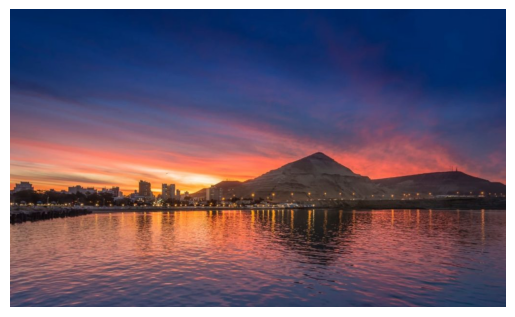

In [ ]:
# Así entonces, se puede mostrar la imagen en el notebook
plt.imshow(img1_rgb)
plt.axis('off')  # Opcional: Oculta los ejes
plt.show()

In [7]:
# Luego, se cargan la imagen satelital óptica:
img2 = cv2.imread("C:/Users/arnic/Desktop/Ariel/MCD/13 - A y T de Imagenes satelitales/Images/Glaciares/LC08_L1TP_231095_20250109_20250121_02_T1_refl.tif")
type(img1)

numpy.ndarray

In [8]:
img2.shape

(8091, 8091, 3)

In [ ]:
# La imagen img2 tiene una dimension de 8091 píxeles de alto x 8091 píxeles de ancho. También en el sistema RGB.

In [9]:
# Se debe convertir de BGR a RGB para que se vea correctamente con matplotlib
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

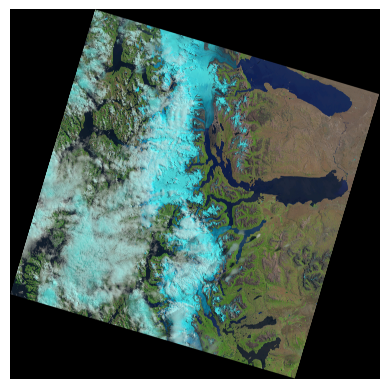

In [10]:
# Se despliega entonces, la imagen en el notebook
plt.imshow(img2_rgb)
plt.axis('off')  # Opcional: Oculta los ejes
plt.show()

b) Se guarda una imagen a un archivo.

In [11]:
# Se selecciona la imagen img1 para guardar.
cv2.imwrite("atardecer.jpeg", img1_rgb)

True

c) Se obtiene el valor de un pixel en una imagen

In [13]:
# De la imagen img2, se puede obtener el valor de un pixel, en el centro de la imagen
img2_rgb[4045, 4045]

array([46, 75, 83], dtype=uint8)

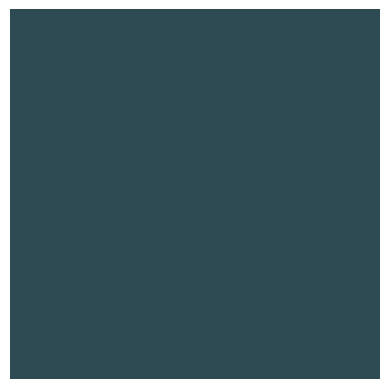

In [18]:
# Para observar el color de este pixel, primero se crea una imagen nueva con ese color
color_pix = np.full((10, 10, 3), img2_rgb[4045, 4045], dtype=np.uint8)

# Se despliega entonces, la imagen en el notebook
plt.imshow(color_pix)
plt.axis('off')  # Opcional: Oculta los ejes
plt.show()

In [ ]:
# Se compara y se observa que coincide con los colores en el centro de la imagen.

d) Se copia una parte de la imagen en otra imagen nueva

In [ ]:
# Se copia un cuadrado de 100x100 desde el centro de la imagen img1

# Primero se ubica el centro
alto, ancho = img1_rgb.shape[:2]
centro_y, centro_x = alto // 2, ancho // 2

# Obtenemos las coordenadas del cuadrado (desde y1:y2, x1:x2)
y1, y2 = centro_y - 50, centro_y + 50
x1, x2 = centro_x - 50, centro_x + 50

# Obtenemos el recorte de la imagen a copiar
recorte = img1_rgb[y1:y2, x1:x2]

In [24]:
# Se crea una nueva imagen vacía del mismo tamaño

nueva_imagen = np.zeros_like(img1_rgb)  # Imagen en negro, misma forma que la original
# Pegamos el recorte en la esquina
nueva_imagen[0:100, 0:100] = recorte  

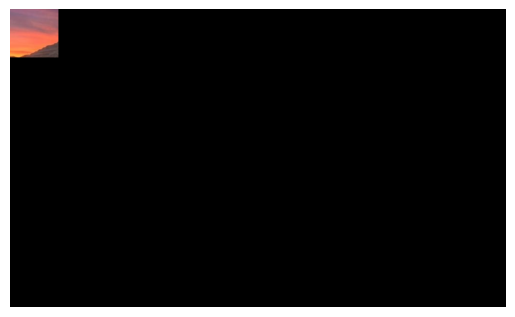

In [25]:
# Se despliega entonces, la imagen copiada
plt.imshow(nueva_imagen)
plt.axis('off')  # Opcional: Oculta los ejes
plt.show()

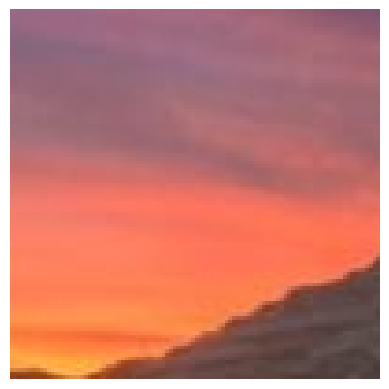

In [26]:
# Se puede observar mas de cerca la imagen copiada
plt.imshow(nueva_imagen[0:100, 0:100])
plt.axis('off')  # Opcional: Oculta los ejes
plt.show()

e) Se guarda la imagen cortada con otro nombre.

In [27]:
# Se guarda la imagen copiada
img1_recorte = nueva_imagen[0:100, 0:100]

# Se selecciona la imagen para guardar.
cv2.imwrite("atardecer_recorte.jpeg", img1_recorte)

True

### 3. Implementar la función de potencia y aplicarla a una imagen en niveles de gris. Variar el valor de gamma para observar los resultados.

In [28]:
# Transformación gamma para aumento del contraste

# Se obtiene la imagen img1 en niveles de gris
img1_gray = cv2.imread("C:/Users/arnic/Desktop/Ariel/MCD/13 - A y T de Imagenes satelitales/Images/FOTO-TURISMO-1-1024x615.jpeg", cv2.IMREAD_GRAYSCALE)

In [ ]:
# Se define un valor de gamma mayor a 1
gamma = 2.0

In [30]:
# Se crea una tabla de transformación gamma (lookup table)
tabla_gamma = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)]).astype(np.uint8)

In [31]:
# Se aplica la transformación gamma
imagen_gamma1 = cv2.LUT(img1_gray, tabla_gamma)

(np.float64(-0.5), np.float64(1023.5), np.float64(614.5), np.float64(-0.5))

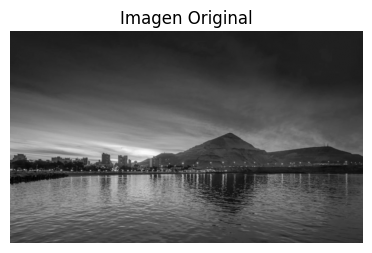

In [32]:
# Se compara con la imagen original
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img1_gray, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

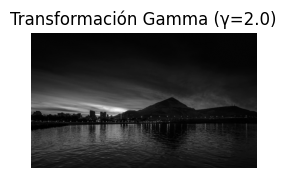

In [35]:
# Se observan los resultados al aplicar la transformación gamma con valores mayores a 1
plt.subplot(1, 2, 1)
plt.imshow(imagen_gamma1, cmap='gray')
plt.title(f'Transformación Gamma (γ={gamma})')
plt.axis('off')
plt.show()

In [ ]:
# Ahora se define un valor de gamma menor a 1
gamma = 0.5

In [37]:
# Se crea una tabla de transformación gamma (lookup table)
tabla_gamma = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)]).astype(np.uint8)

In [38]:
# Se aplica la transformación gamma
imagen_gamma2 = cv2.LUT(img1_gray, tabla_gamma)

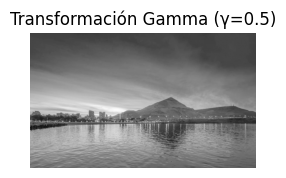

In [39]:
# Se observan los resultados al aplicar la transformación gamma con valores menores a 1
plt.subplot(1, 2, 1)
plt.imshow(imagen_gamma2, cmap='gray')
plt.title(f'Transformación Gamma (γ={gamma})')
plt.axis('off')
plt.show()

In [ ]:
# Conclusión: con valores de gamma menores a 1, el contraste de la imagen baja y se observa mas clara. 
# Con valores de gamma mayores a 1, el contraste aumenta y la imagen se observa mas oscura. 

### 4. Implementar una función que devuelva el negativo de una imagen y aplicarlo a una imagen RGB banda por banda.

In [ ]:
# Se define la función que permita devolver el negativo de la imagen satelital img2 (ya convertida en RGB)

def negativo_rgb(imagen_rgb):
    # Se serapan las bandas
    R, G, B = cv2.split(imagen_rgb)
    
    # Se aplica el negativo a cada banda
    R_neg = 255 - B
    G_neg = 255 - G
    B_neg = 255 - R
    
    # Se recomponer la imagen negativa
    negativo = cv2.merge([R_neg, G_neg, B_neg])
    return negativo

In [41]:
# Se aplica la función a la imagen img2

imagen_negativa = negativo_rgb(img2_rgb)

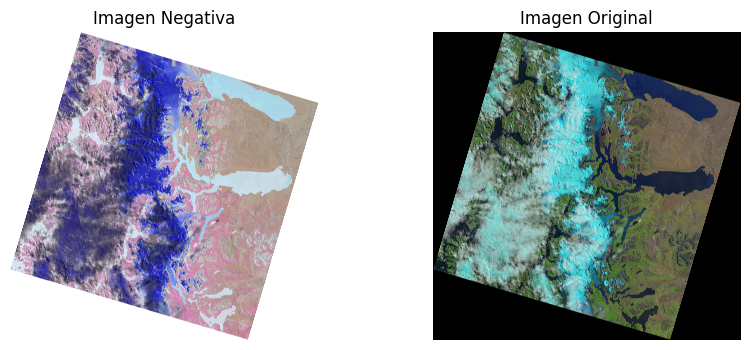

In [ ]:
# Se observan los resultados y se compara con la imagen original

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(imagen_negativa)
plt.title('Imagen Negativa')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.show()

In [ ]:
# Aplicar el negativo banda por banda permite aplicar operaciones distintas por canal y control mas detallado del procesamiento.

### 5. Implementar una función que devuelva el histograma de niveles de gris de cada banda de una imagen.

In [ ]:
# Para una imagen RGB, cada banda (R, G, B) tiene valores de 0 a 255. El histograma cuenta cuántos píxeles hay para cada intensidad en cada canal.

In [66]:
# Se define la función que permita obtener el histograma de la imagen img1 (ya convertida en RGB)

def calcular_histogramas_bandas(imagen_rgb):
    # Se separan las bandas RGB
    R, G, B = cv2.split(imagen_rgb)
    total_pixeles = imagen_rgb.shape[0] * imagen_rgb.shape[1]  # Alto × Ancho
    
    # Calcular el histograma de cada banda
    hist_R = cv2.calcHist([R], [0], None, [256], [0, 256])
    hist_G = cv2.calcHist([G], [0], None, [256], [0, 256])
    hist_B = cv2.calcHist([B], [0], None, [256], [0, 256])
    
    # Se normaliza para obtener la frecuencia relativa
    hist_R /= total_pixeles
    hist_G /= total_pixeles
    hist_B /= total_pixeles

    return hist_R, hist_G, hist_B

In [67]:
# Se Calculan los histogramas
hist_R, hist_G, hist_B = calcular_histogramas_bandas(img2_rgb)

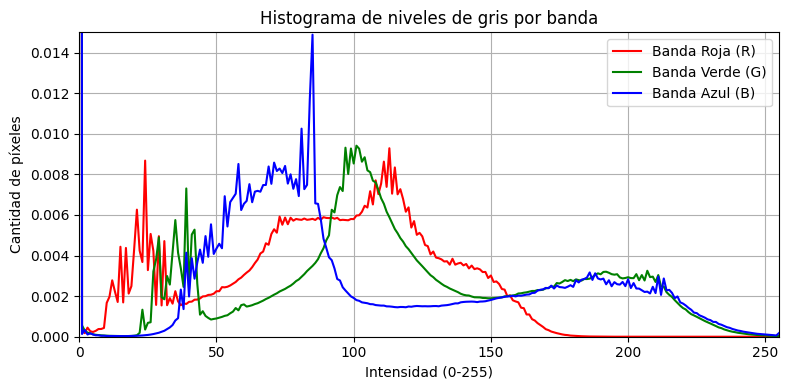

In [71]:
# Se grafican los histogramas

plt.figure(figsize=(8, 4))
plt.plot(hist_R, color='red', label='Banda Roja (R)')
plt.plot(hist_G, color='green', label='Banda Verde (G)')
plt.plot(hist_B, color='blue', label='Banda Azul (B)')
plt.title('Histograma de niveles de gris por banda')
plt.xlabel('Intensidad (0-255)')
plt.ylabel('Cantidad de píxeles')
plt.legend()
plt.grid(True)
plt.xlim(0, 255)
plt.ylim(0, 0.015) # Se limita el eje y porque las bandas poseen muchos valores cercanos al cero
plt.tight_layout()

plt.show()

### 6. Implementar una función que aplique un umbral a cada banda de una imagen, devolviendo una imagen binaria para cada una.

In [63]:
# Se define la función que permita aplicar el umbral a cada banda

def umbral_por_banda(imagen_rgb, umbral_r, umbral_g, umbral_b):
    # Separar las bandas RGB
    R, G, B = cv2.split(imagen_rgb)

    # Aplicar umbral a cada banda
    _, binaria_R = cv2.threshold(R, umbral_r, 255, cv2.THRESH_BINARY)
    _, binaria_G = cv2.threshold(G, umbral_g, 255, cv2.THRESH_BINARY)
    _, binaria_B = cv2.threshold(B, umbral_b, 255, cv2.THRESH_BINARY)

    return binaria_R, binaria_G, binaria_B

In [64]:
# Se aplican umbrales iguales por banda
umbral_r = 100
umbral_g = 100
umbral_b = 100
bin_r, bin_g, bin_b = umbral_por_banda(img2_rgb, umbral_r, umbral_g, umbral_b)

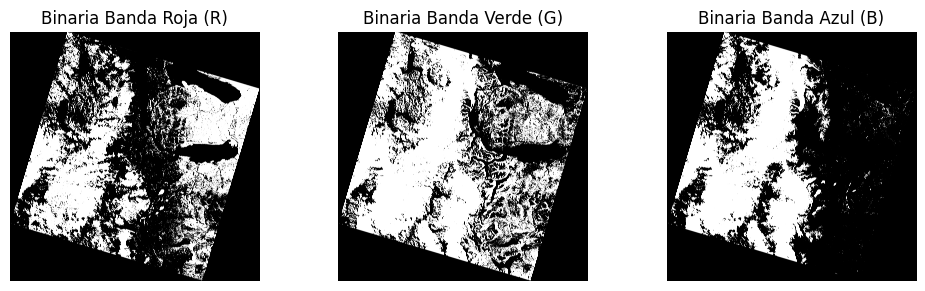

In [65]:
# Se muestran los resultados
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(bin_r, cmap='gray')
plt.title('Binaria Banda Roja (R)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bin_g, cmap='gray')
plt.title('Binaria Banda Verde (G)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(bin_b, cmap='gray')
plt.title('Binaria Banda Azul (B)')
plt.axis('off')

plt.tight_layout()
plt.show()

### 7. Implementar una función que realice la ecualización del histograma para mejorar la imagen, realizar la operación banda por banda, observar los resultados.

In [ ]:
# La ecualización de histograma permite mejorar el contraste de una imagen, redistribuyendo los niveles de gris para que haya una representación mas uniforme de intensidades.

In [75]:
# Se define la función para la ecualización del histograma de la imagen img1 (ya convertida en RGB)

def ecualizar_por_banda(imagen_rgb):
    # Separar las bandas R, G y B
    R, G, B = cv2.split(imagen_rgb)

    # Aplicar ecualización de histograma a cada banda
    R_eq = cv2.equalizeHist(R)
    G_eq = cv2.equalizeHist(G)
    B_eq = cv2.equalizeHist(B)

    # Recomponer la imagen RGB ecualizada
    imagen_ecualizada = cv2.merge([R_eq, G_eq, B_eq])
    return imagen_ecualizada

In [76]:
# Se ecualiza por banda
imagen_ecualizada = ecualizar_por_banda(img1_rgb)

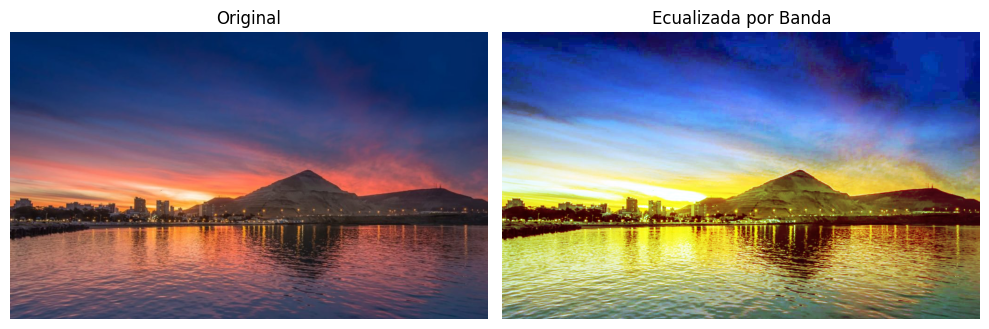

In [77]:
# Se compara la imagen original y ecualizada
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img1_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_ecualizada)
plt.title('Ecualizada por Banda')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# En este caso, se observa que el contraste mejoró y se aprecian mas detalles en la imagen.

### 8. Aplicar la ecualización del histograma por segunda vez a la misma imagen. Observar el resultado y dar una explicación de lo sucedido.

In [78]:
# Se aplica nuevamente la función de ecualización a la imagen obtenida anteriormente
imagen_ecualizada2 = ecualizar_por_banda(imagen_ecualizada)

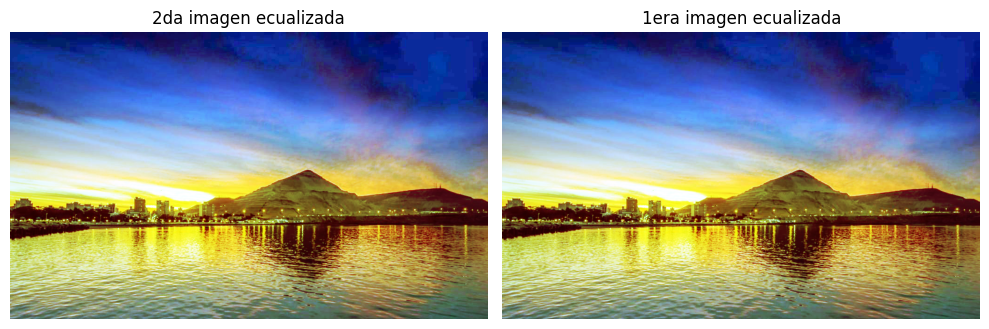

In [79]:
# Se compara la imagen finalmente obtenida con la primera ecualizada
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(imagen_ecualizada2)
plt.title('2da imagen ecualizada')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_ecualizada)
plt.title('1era imagen ecualizada')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Al aplicar nuevamente la ecualización del histograma a una imagen que ya fue ecualizada, el resultado no cambia significativamente. 
# Esto se debe a que después de la primera ecualización, los valores ya están "repartidos" de forma bastante uniforme. 
# Una segunda ecualización sobre esa imagen ya transformada no tiene mucho efecto porque el histograma ya está distribido de forma pareja.

### 9. Agregar ruido a una imagen.

a) Contaminar un porcentaje de una imagen con ruido Gaussiano aditivo.

In [109]:
# Se define la función que permite agregar ruido Gaussiano

def agregar_ruido_gaussiano(imagen_rgb, porcentaje, media=0, desvio=20):
    """
    Agrega ruido Gaussiano aditivo a un porcentaje de los píxeles de la imagen.
    
    Args:
        imagen_rgb: imagen en formato RGB.
        porcentaje: porcentaje de píxeles a contaminar (0–100).
        media: media del ruido.
        desvio: desviación estándar del ruido.
        
    Returns:
        Imagen con ruido gaussiano agregado.
    """
    imagen = imagen_rgb.astype(np.float32)
    total_pixeles = imagen.shape[0] * imagen.shape[1]
    n_ruido = int(total_pixeles * (porcentaje / 100))
    
    indices = np.random.choice(total_pixeles, n_ruido, replace=False)
    ruido = np.random.normal(media, desvio, (n_ruido, 3))  # una perturbación para cada canal

    flat = imagen.reshape(-1, 3)
    flat[indices] += ruido
    flat = np.clip(flat, 0, 255)

    return flat.reshape(imagen.shape).astype(np.uint8)

In [110]:
# Se definen los parámetros
porcentaje_gauss = 30     # % de los píxeles
media = 0
desvio = 30

In [111]:
# Se aplica el ruido aditivo
imagen_gauss = agregar_ruido_gaussiano(img1, porcentaje_gauss, media, desvio)

b) Contaminar un porcentaje de una imagen con ruido exponencial multiplicativo.

In [113]:
# Se define la función que permite agregar ruido exponencial

def agregar_ruido_exponencial(imagen_rgb, porcentaje, lamda=1.5):
    """
    Agrega ruido Exponencial multiplicativo a un porcentaje de los píxeles.
    
    Args:
        imagen_rgb: imagen en formato RGB.
        porcentaje: porcentaje de píxeles a contaminar (0–100).
        lamda: parámetro lambda del ruido exponencial.
        
    Returns:
        Imagen con ruido exponencial multiplicativo agregado.
    """
    imagen = imagen_rgb.astype(np.float32)
    total_pixeles = imagen.shape[0] * imagen.shape[1]
    n_ruido = int(total_pixeles * (porcentaje / 100))
    
    indices = np.random.choice(total_pixeles, n_ruido, replace=False)
    ruido = np.random.exponential(scale=1/lamda, size=(n_ruido, 3))  # multiplicador por canal

    flat = imagen.reshape(-1, 3)
    flat[indices] *= ruido
    flat = np.clip(flat, 0, 255)

    return flat.reshape(imagen.shape).astype(np.uint8)

In [114]:
# Se definen los parámetros
porcentaje_exp = 30    # % de los píxeles
lambda_exp = 2.5

In [115]:
# Se aplica el ruido multiplicativo
imagen_exp = agregar_ruido_exponencial(img1, porcentaje_exp, lambda_exp)

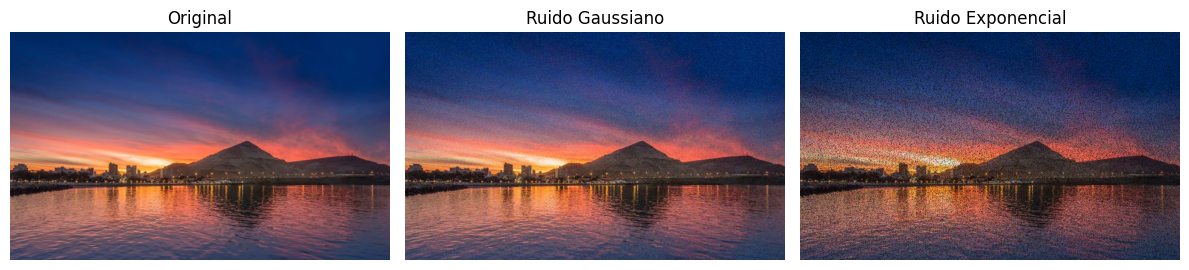

In [116]:
# Ahora se comparan los resultados con la imagen original
def mostrar(imagenes, titulos):
    plt.figure(figsize=(12, 4))
    for i, (img, title) in enumerate(zip(imagenes, titulos), 1):
        plt.subplot(1, len(imagenes), i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

mostrar([img1, imagen_gauss, imagen_exp],
        ["Original", "Ruido Gaussiano", "Ruido Exponencial"])

### 10. Implementar un generador de ruido Sal y Pimienta y aplicarlo una imagen.

In [ ]:
# El ruido Sal y Pimienta es un tipo de ruido impulsivo donde algunos píxeles se reemplazan aleatoriamente por:
# 0 (negro) → "Pimienta"
# 255 (blanco) → "Sal"

In [117]:
# Se define la función que permite agregar el ruido Sal y Pimienta

def agregar_ruido_sal_pimienta(imagen_bgr, porcentaje):
    """
    Aplica ruido Sal y Pimienta a un porcentaje de píxeles de una imagen BGR.

    Args:
        imagen_bgr: imagen de entrada (color).
        porcentaje: porcentaje de píxeles a contaminar (0–100).

    Returns:
        Imagen con ruido sal y pimienta.
    """
    imagen = imagen_bgr.copy()
    total_pixeles = imagen.shape[0] * imagen.shape[1]
    num_ruido = int(total_pixeles * porcentaje / 100)

    # Coordenadas aleatorias para sal y pimienta
    coords = np.random.choice(total_pixeles, size=num_ruido, replace=False)
    coords = np.unravel_index(coords, (imagen.shape[0], imagen.shape[1]))

    # Separar en mitad para sal y mitad para pimienta
    mitad = num_ruido // 2
    sal_coords = (coords[0][:mitad], coords[1][:mitad])
    pimienta_coords = (coords[0][mitad:], coords[1][mitad:])

    # Aplicar ruido
    imagen[sal_coords] = [255, 255, 255]       # Sal (blanco)
    imagen[pimienta_coords] = [0, 0, 0]        # Pimienta (negro)

    return imagen

In [118]:
# Se aplica el ruido sal y pimienta
imagen_ruido_sp = agregar_ruido_sal_pimienta(img1, porcentaje=10)  # % de los píxeles

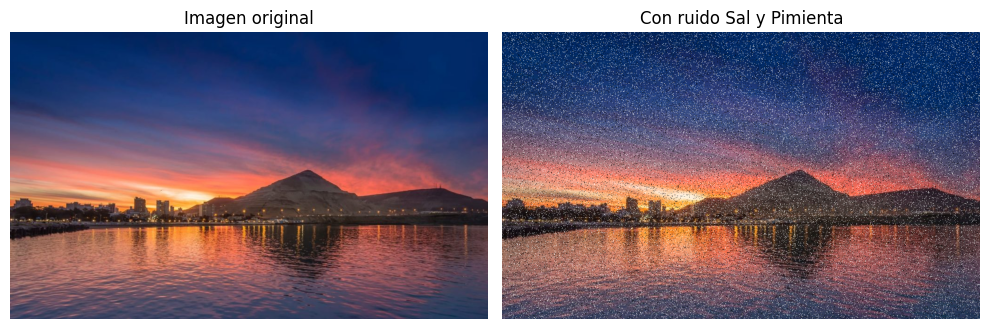

In [119]:
# Se observan y comparan los resultados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagen_ruido_sp, cv2.COLOR_BGR2RGB))
plt.title("Con ruido Sal y Pimienta")
plt.axis("off")
plt.tight_layout()
plt.show()

### 12. Respuestas a preguntas teóricas:

_a)_ Dado un pixel (*x*, *y*), definir la 8-vecindad del pixel en función de sus coordenadas. ¿Por qué es importante la vecindad?

La 8-vecindad de un píxel (*x, y*) se define como los 8 píxeles que lo rodean en una imagen. Es decir, todos los píxeles adyacentes al píxel (*x, y*) en dirección horizontal, vertical y diagonal. 

En coordenadas se observa:

In [120]:
from IPython.display import display, Math

display(Math(r"""
\begin{array}{ccc}
(x-1, y-1) & (x, y-1) & (x+1, y-1) \\
(x-1, y)   & (x, y)   & (x+1, y)   \\
(x-1, y+1) & (x, y+1) & (x+1, y+1)
\end{array}
"""))

<IPython.core.display.Math object>

La 8-vecindad es fundamental en el procesamiento de imágenes por varias razones:

- Detección de bordes: se comparan píxeles con sus vecinos para encontrar cambios bruscos de intensidad.

- Filtrado: filtros como el media, mediana, gaussiano, usan la vecindad para suavizar o realzar estructuras.

- Segmentación: se agrupan píxeles similares que son vecinos, para identificar regiones homogéneas.

- Morfología matemática: operaciones como dilatación o erosión se basan en los valores de los vecinos.

- Crecimiento de regiones: se expande una región a partir de un píxel considerando sus vecinos similares.

- Conectividad: define si un conjunto de píxeles forma una región conectada. Con la 8-vecindad se permite conexión diagonal.



_b)_ Dé la definición de histograma. ¿Para qué sirve estudiar el histograma de una imagen?

El histograma de una imagen es una representación gráfica o numérica que muestra la frecuencia de aparición de cada nivel de intensidad de los píxeles. En una imagen en escala de grises, el histograma indica cuántos píxeles tienen un valor entre 0 (negro) y 255 (blanco). En una imagen en color (RGB), se puede calcular un histograma por cada canal (R, G, B).

El análisis del histograma permite:

- Evaluar el contraste de la imagen:

  - Si los valores están concentrados en un rango estrecho → la imagen tiene bajo contraste.

  - Si están bien distribuidos → la imagen tiene buen contraste.

- Guiar operaciones de mejora:

  - Como ecualización de histograma para mejorar contraste.

  - Umbralización para binarizar imágenes.

- Comparar imágenes:

  - Para tareas como reconocimiento, búsqueda o detección de cambios.

- Caracterizar imágenes en procesamiento automático:

  - Es útil como descriptor en análisis de contenido (vision artificial, machine learning, etc.).

*c)* ¿Qué es una banda de una imagen? ¿Cuántas bandas tiene una imagen satelital óptica?

Una banda en una imagen es un conjunto de datos que representa la intensidad de la radiación electromagnética reflejada o emitida por la superficie terrestre en una longitud de onda específica. En una imagen digital común (como una fotografía RGB), cada banda corresponde a un color: rojo (R), verde (G) y azul (B). Cada banda se puede pensar como una imagen en escala de grises, que muestra la intensidad capturada en ese canal específico. 

La cantidad de bandas de una imagen satelital óptica depende del satélite y su resolución espectral. Como por ejemplos:

| Satélite / Sensor      | Número de bandas ópticas      | Tipos de bandas                                                     |
| ---------------------- | ----------------------------- | ------------------------------------------------------------------- |
| **Landsat 8/9 (OLI)**  | 9 bandas ópticas              | Costera, azul, verde, rojo, NIR, SWIR1, SWIR2, pancromática, cirros |
| **Sentinel-2 (MSI)**   | 13 bandas (10 ópticas útiles) | Desde visible hasta infrarrojo de onda corta                        |
| **WorldView-3**        | Hasta 16 bandas               | RGB, NIR, bandas de vegetación, etc.                                |
| **MODIS (Terra/Aqua)** | 36 bandas (multiespectrales)  | Visible hasta térmico (usadas para monitoreo global)                |
